### Proyecto: Análisis y desarrollo de modelos predictivos de Alzheimer mediante Machine Learning en base a factores de riesgo.


### Librerias Empleadas

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.stats.weightstats import ttest_ind as ttest_ind_statsmodels
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
from scipy.stats import skew, kurtosis
from scipy.stats import pearsonr, spearmanr
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score








### Análisis Exploratorio de los Datos

In [88]:
df = pd.read_csv("dementia_patients_health_data.csv")
df.head(100)

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.106571,81,90.911397,37.222030,74.864811,27.373216,Memantine,10.0,66,...,Never Smoked,Positive,Moderate Activity,No,6,Yes,Mediterranean Diet,Poor,Diabetes,1
96,1,0.022258,69,98.869776,36.539323,64.598680,8.015910,NaN,NaN,89,...,Never Smoked,Negative,Mild Activity,No,8,No,Mediterranean Diet,Good,Diabetes,0
97,1,0.019838,93,95.302479,36.962013,51.228662,44.006270,Galantamine,4.0,83,...,Never Smoked,Positive,Mild Activity,No,3,No,Balanced Diet,Good,Diabetes,1
98,1,0.028917,87,93.866333,36.094949,87.234322,41.355597,Memantine,5.0,67,...,Former Smoker,Positive,Moderate Activity,No,2,No,Low-Carb Diet,Good,Diabetes,1


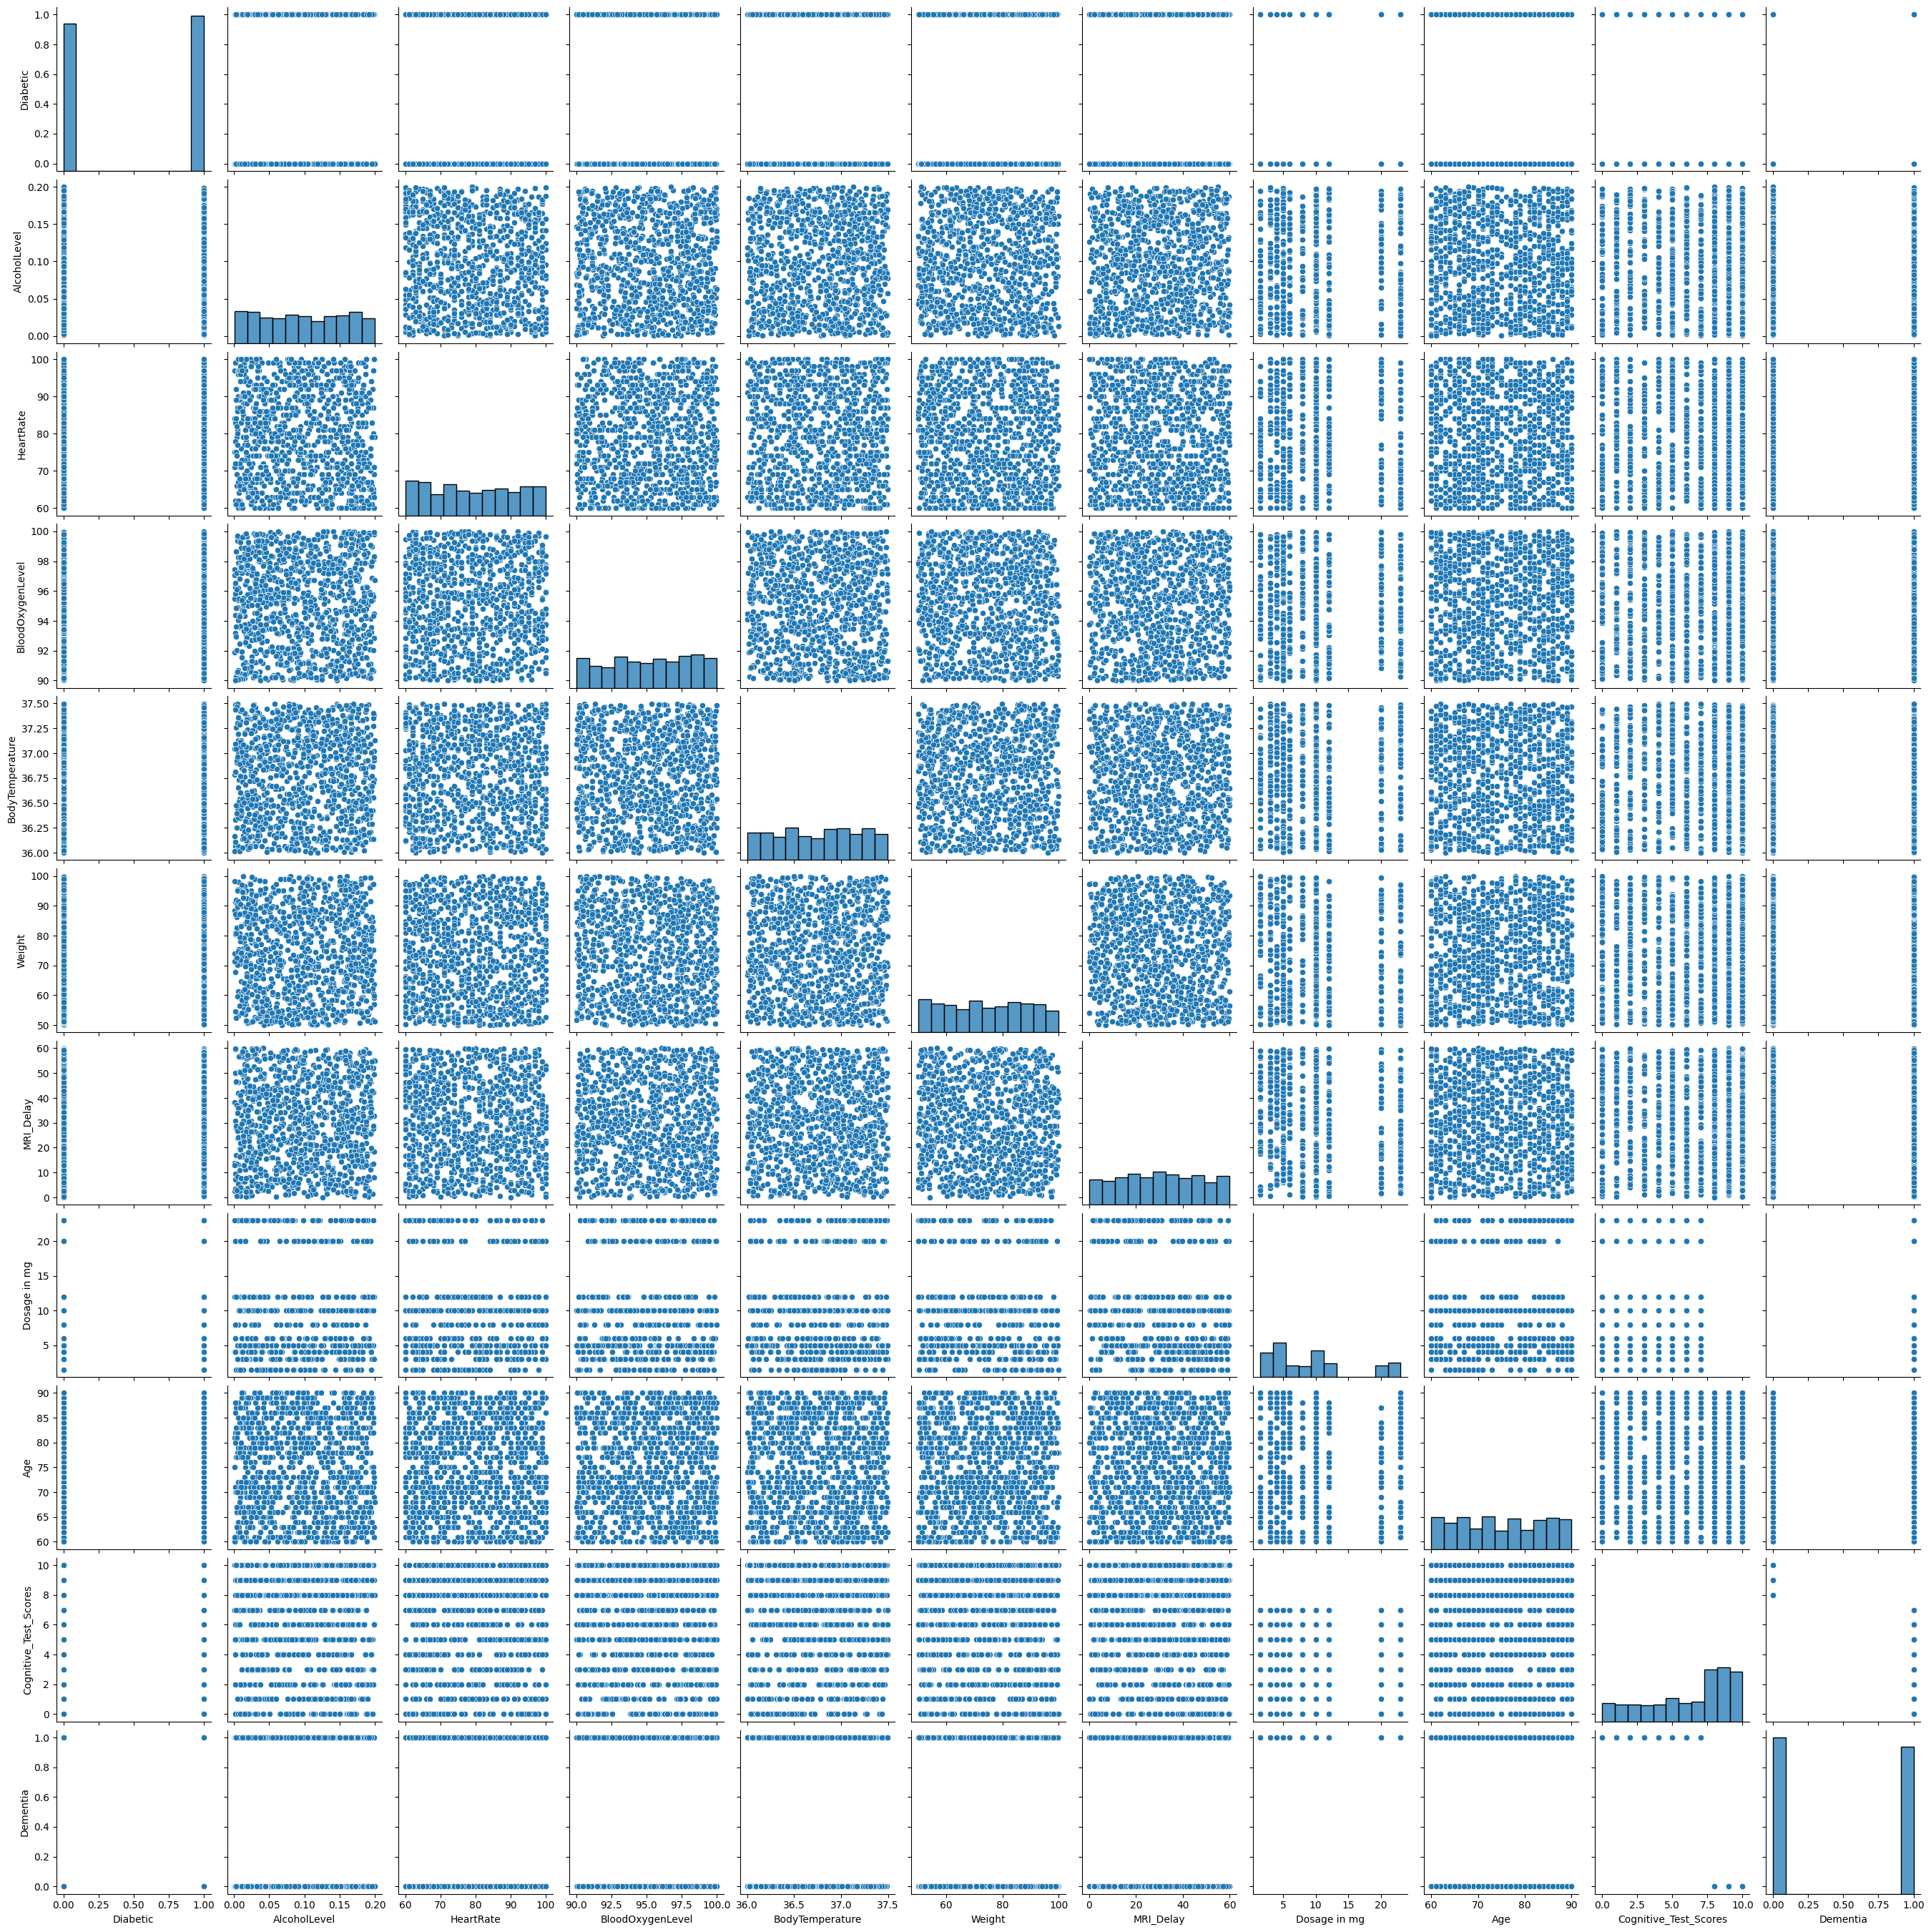

In [89]:
sns.pairplot(df)

In [90]:
quantitative_vars = ['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 'Age', 'Cognitive_Test_Scores']
qualitative_vars = ['Diabetic', 'Education_Level', 'Gender', 'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity', 'Depression_Status', 'Medication_History', 'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions', 'Dementia']
df[qualitative_vars] = df[qualitative_vars].astype('category')


In [91]:
summary_quantitative = df[quantitative_vars].describe().T
summary_quantitative = summary_quantitative[['count', 'mean', 'std', 'min', 'max']]
summary_quantitative.columns = ['N', 'Media', 'Desviación Estándar', 'Mínimo', 'Máximo']
summary_quantitative

,N,Media,Desviación Estándar,Mínimo,Máximo
AlcoholLevel,1000.0,0.098429,0.058715,0.000414,0.199866
HeartRate,1000.0,79.383000,12.107556,60.000000,100.000000
BloodOxygenLevel,1000.0,95.226051,2.929262,90.010677,99.999230
BodyTemperature,1000.0,36.761513,0.431701,36.002108,37.496809
Weight,1000.0,74.321326,14.463765,50.069731,99.982722
Age,1000.0,74.908000,9.095068,60.000000,90.000000
Cognitive_Test_Scores,1000.0,6.383000,3.180633,0.000000,10.000000


In [92]:
for col in quantitative_vars:
    col_skew = skew(df[col], nan_policy='omit')
    col_kurt = kurtosis(df[col], fisher=True, nan_policy='omit') 
    
    print(f"\nColumna: {col}")
    print(f"Asimetría (skew): {col_skew:.4f}")
    print(f"Curtosis: {col_kurt:.4f}")


Columna: AlcoholLevel
Asimetría (skew): 0.0065
Curtosis: -1.2696

Columna: HeartRate
Asimetría (skew): 0.0515
Curtosis: -1.2639

Columna: BloodOxygenLevel
Asimetría (skew): -0.1192
Curtosis: -1.1790

Columna: BodyTemperature
Asimetría (skew): -0.0617
Curtosis: -1.2074

Columna: Weight
Asimetría (skew): 0.0080
Curtosis: -1.2323

Columna: Age
Asimetría (skew): 0.0124
Curtosis: -1.2582

Columna: Cognitive_Test_Scores
Asimetría (skew): -0.6394
Curtosis: -0.8959


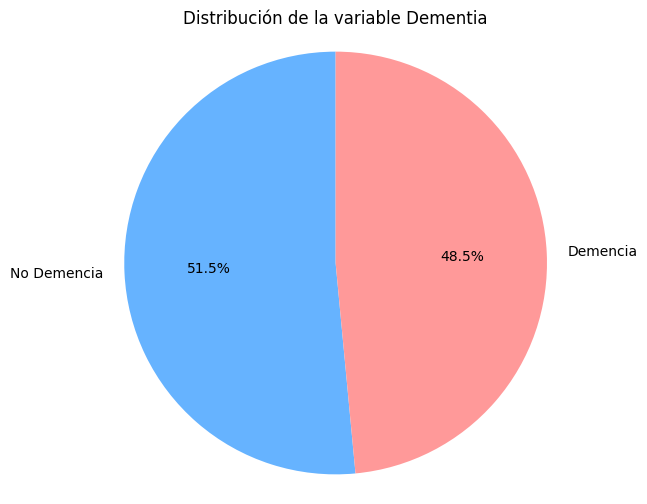

In [93]:
df['Dementia_num'] = df['Dementia']
df['Dementia_label'] = df['Dementia_num'].map({0: 'No Demencia', 1: 'Demencia'})

dementia_counts = df['Dementia_label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(dementia_counts, labels=dementia_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribución de la variable Dementia')
plt.axis('equal')  # para que el pastel quede circular
plt.show()



C:\Users\jonol\AppData\Local\Temp\ipykernel_8628\688770541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')


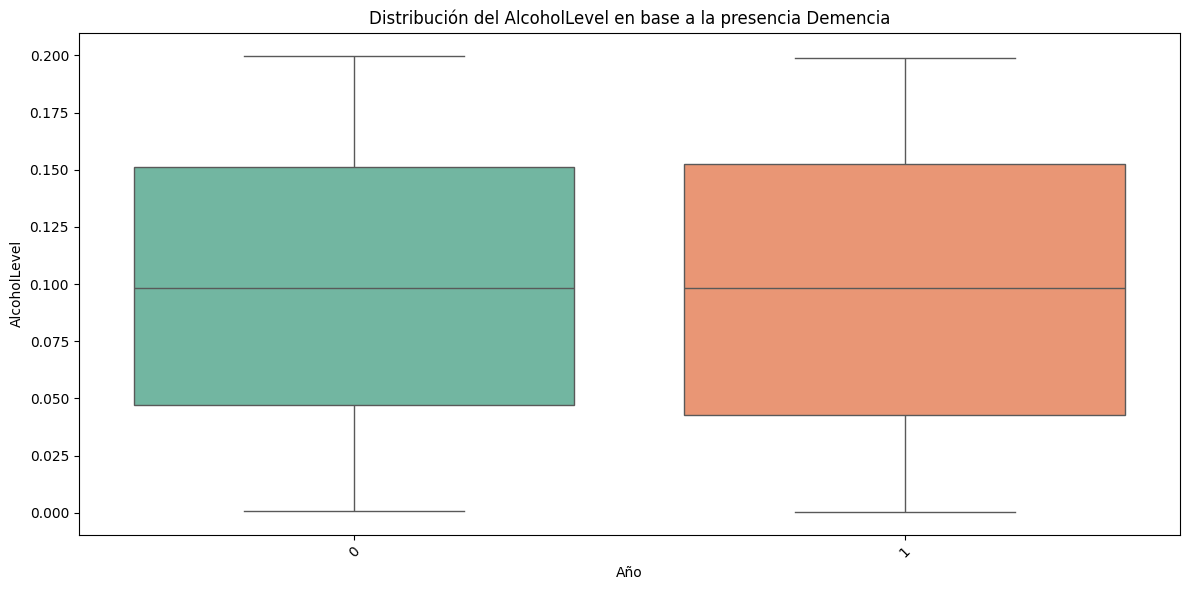

C:\Users\jonol\AppData\Local\Temp\ipykernel_8628\688770541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')


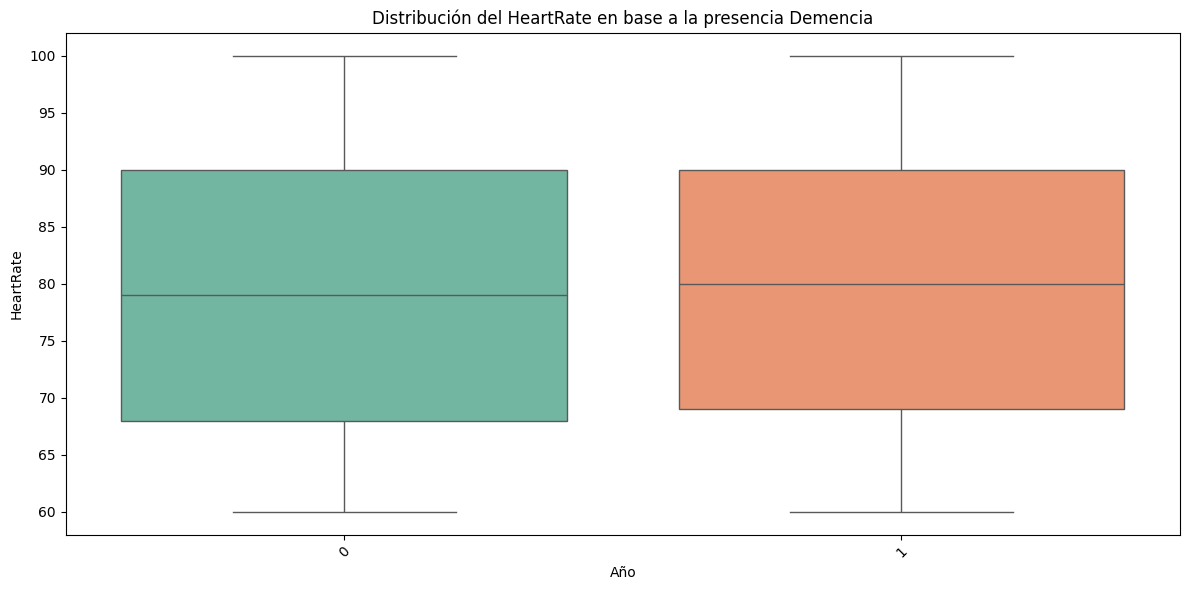

C:\Users\jonol\AppData\Local\Temp\ipykernel_8628\688770541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')


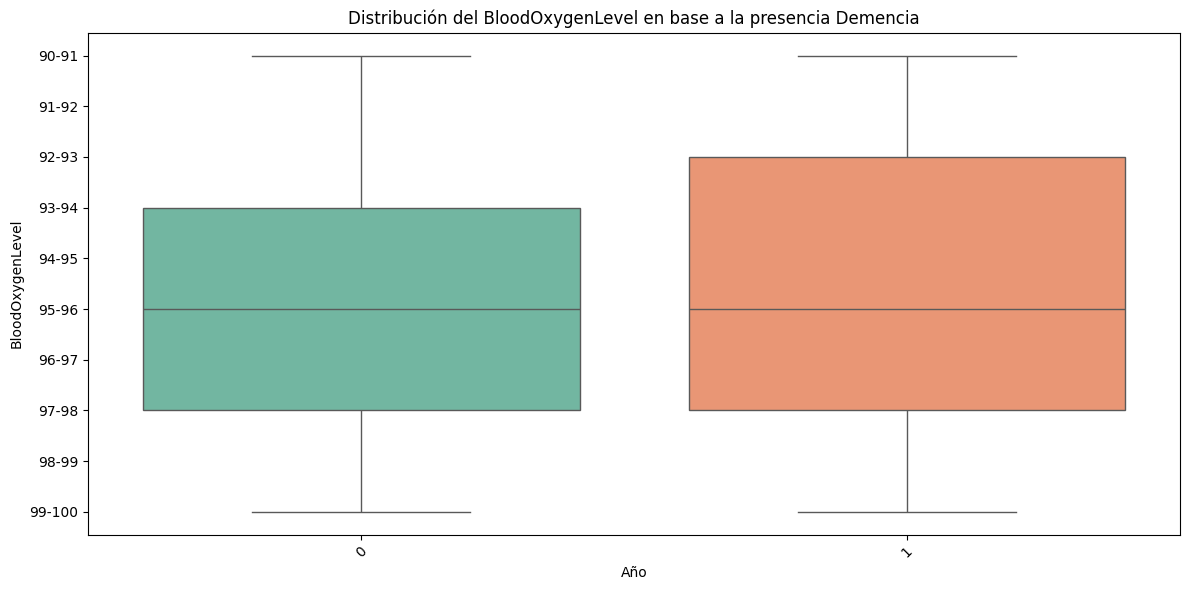

C:\Users\jonol\AppData\Local\Temp\ipykernel_8628\688770541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')


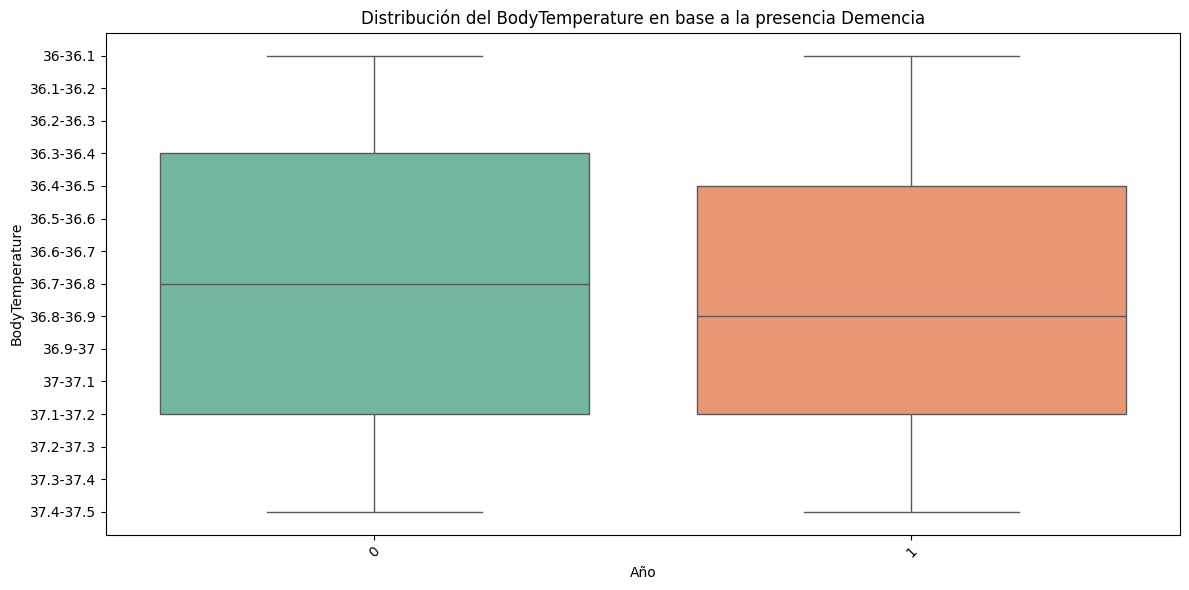

C:\Users\jonol\AppData\Local\Temp\ipykernel_8628\688770541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')


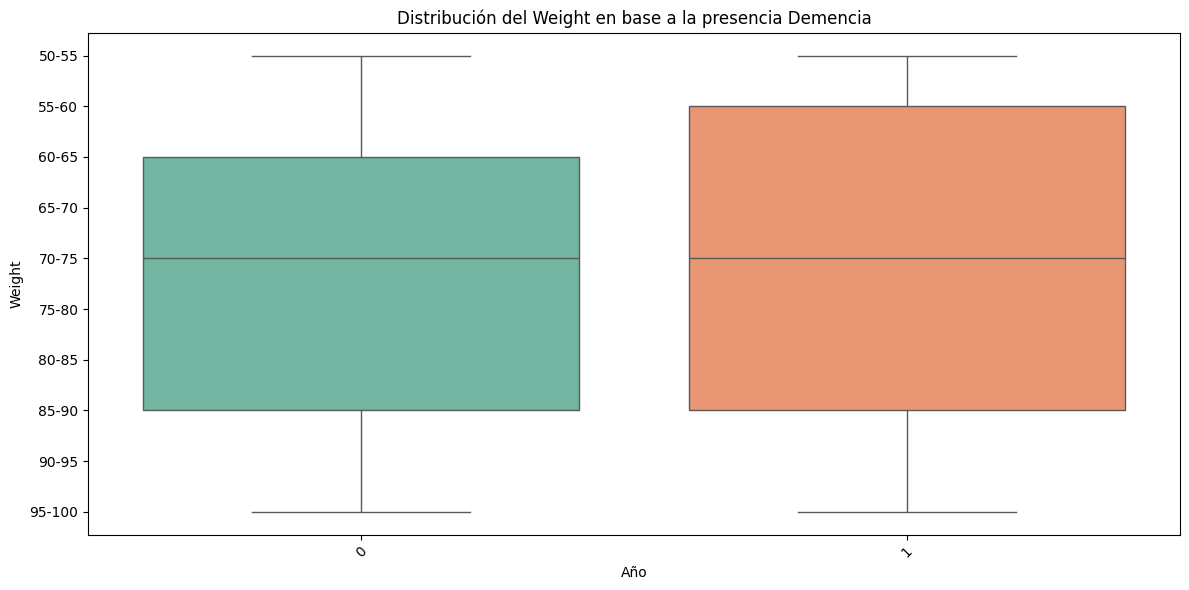

C:\Users\jonol\AppData\Local\Temp\ipykernel_8628\688770541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')


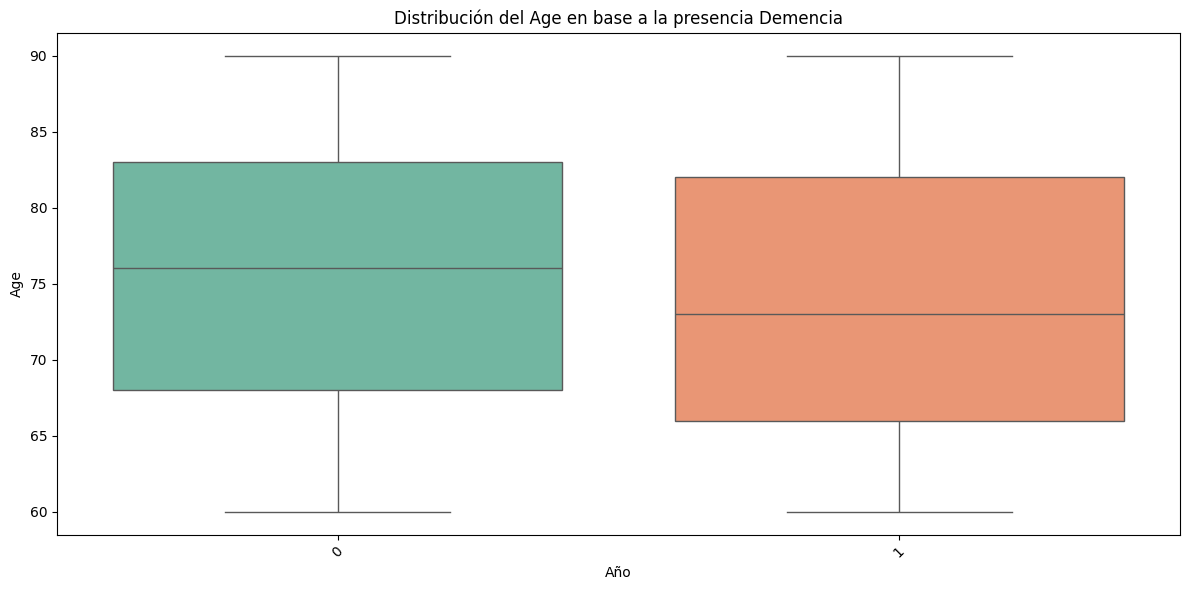

C:\Users\jonol\AppData\Local\Temp\ipykernel_8628\688770541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')


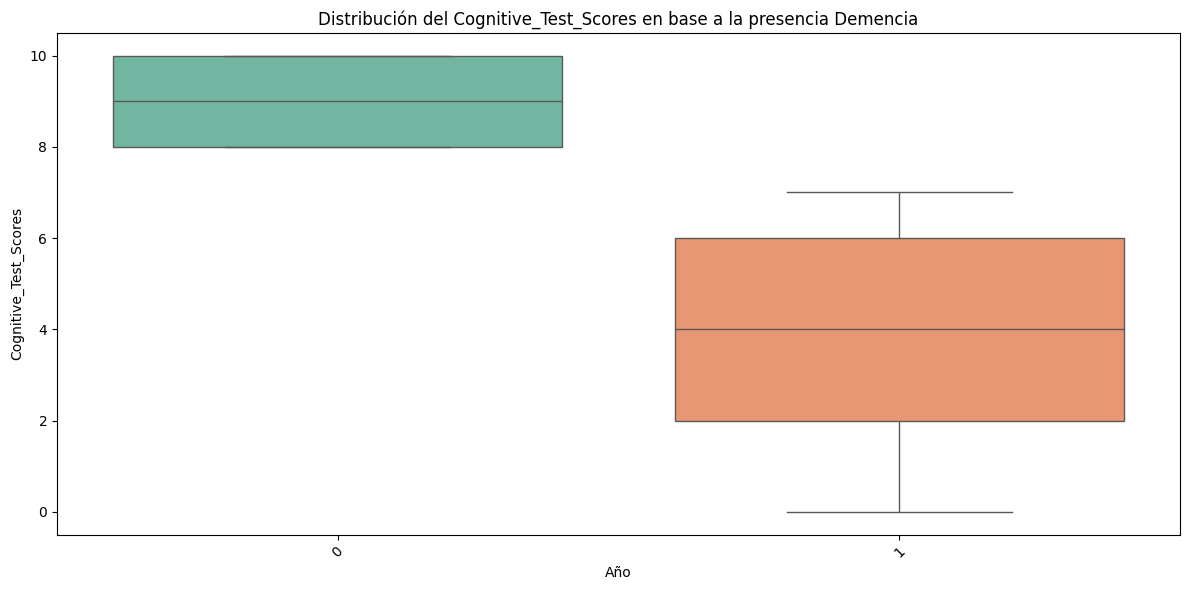

In [125]:

for col in quantitative_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')
    plt.title(f'Distribución del {col} en base a la presencia Demencia')
    plt.xlabel('Año')
    plt.ylabel(f'{col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [95]:
summary_qualitative = df[qualitative_vars].apply(lambda x: x.value_counts()).T.fillna(0)
summary_qualitative['Total'] = df.shape[0]
summary_qualitative

,0,1,Balanced Diet,Current Smoker,Diabetes,Diploma/Degree,Female,Former Smoker,Good,Heart Disease,...,Never Smoked,No,No School,Poor,Positive,Primary School,Secondary School,Sedentary,Yes,Total
Diabetic,487.0,513.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000
Education_Level,0.0,0.0,0.0,0.0,0.0,152.0,0.0,0.0,0.0,0.0,...,0.0,0.0,155.0,0.0,0.0,389.0,304.0,0.0,0.0,1000
Gender,0.0,0.0,0.0,0.0,0.0,0.0,504.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000
Family_History,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,480.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,1000
Smoking_Status,0.0,0.0,0.0,90.0,0.0,0.0,0.0,458.0,0.0,0.0,...,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000
APOE_ε4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,694.0,0.0,0.0,0.0,0.0,1000
Physical_Activity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331.0,0.0,1000
Depression_Status,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,755.0,0.0,0.0,0.0,0.0,0.0,0.0,245.0,1000
Medication_History,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,486.0,0.0,0.0,0.0,0.0,0.0,0.0,514.0,1000
Nutrition_Diet,0.0,0.0,332.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000


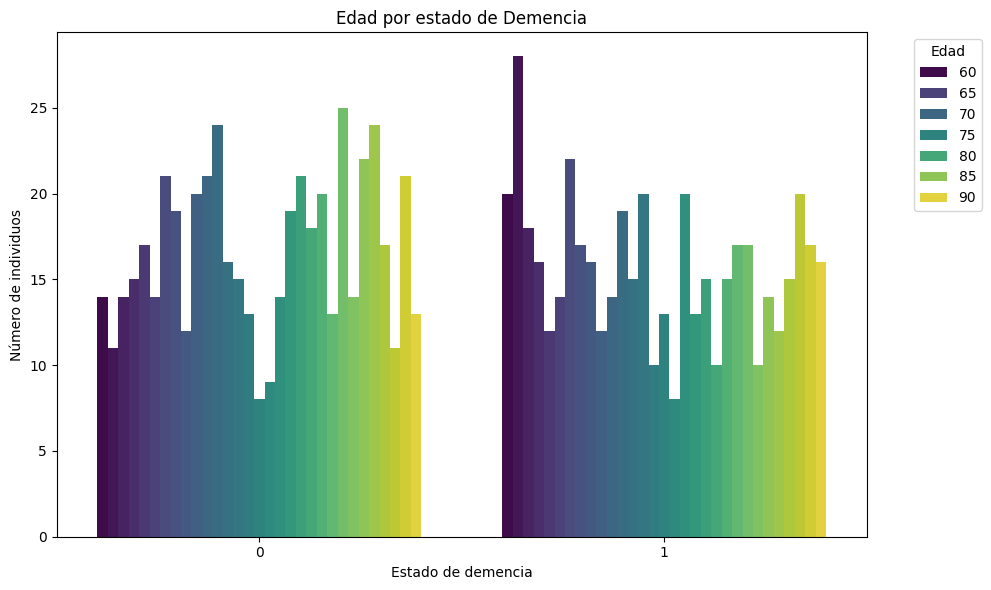

In [96]:
bins = list(range(0, 110, 10))
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Dementia', hue='Age', palette='viridis', dodge=True)

plt.title('Edad por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


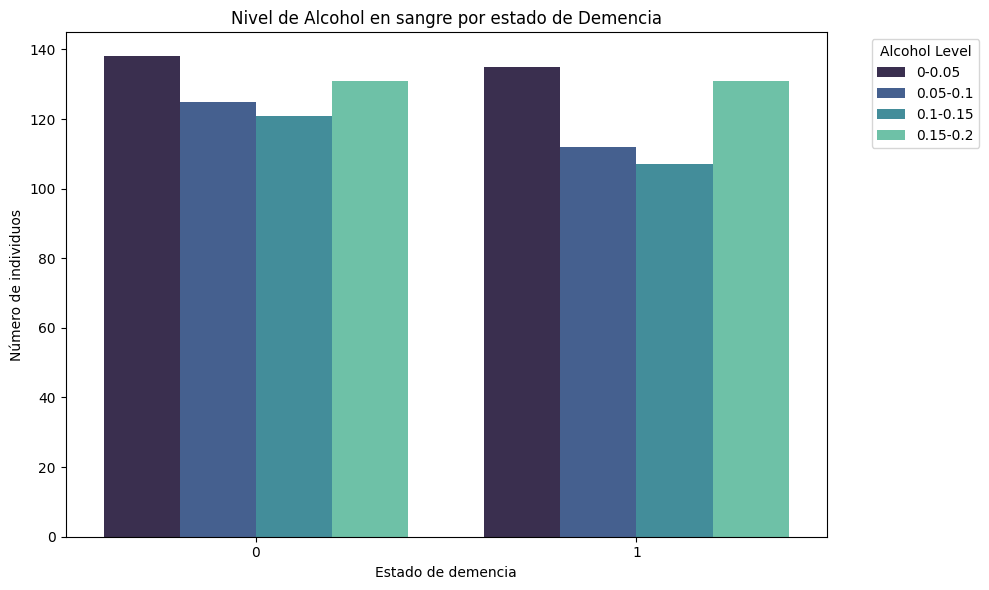

In [97]:

bins = [0.00, 0.05, 0.1, 0.15, 0.2]
labels = ["0-0.05", "0.05-0.1", "0.1-0.15", "0.15-0.2"]

df['AlcoholLevelGroup'] = pd.cut(df['AlcoholLevel'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='AlcoholLevelGroup', palette='mako', dodge=True)

plt.title('Nivel de Alcohol en sangre por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Alcohol Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


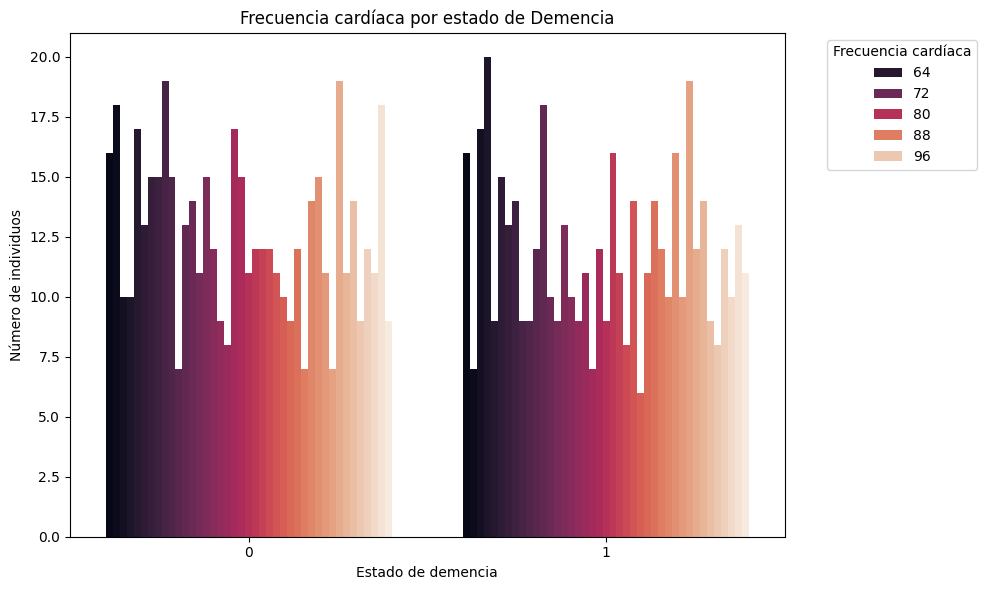

In [98]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='HeartRate', palette='rocket', dodge=True)

plt.title('Frecuencia cardíaca por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Frecuencia cardíaca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

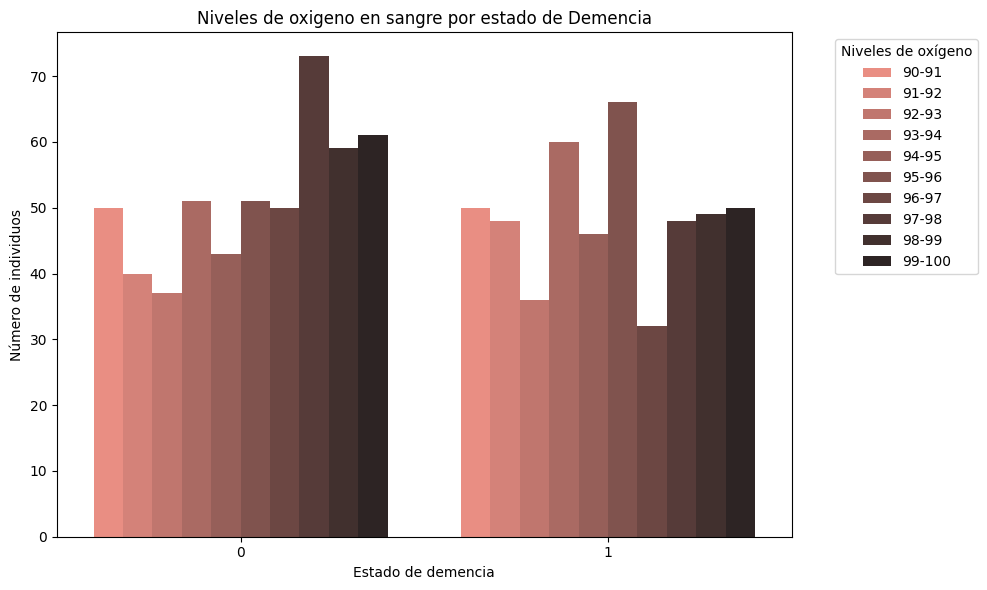

In [99]:
bins = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
labels = ["90-91", "91-92", "92-93", "93-94", "94-95", "95-96", "96-97", "97-98", "98-99", "99-100"]

df['BloodOxygenLevel'] = pd.cut(df['BloodOxygenLevel'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='BloodOxygenLevel', palette='dark:salmon_r', dodge=True)

plt.title('Niveles de oxigeno en sangre por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Niveles de oxígeno', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

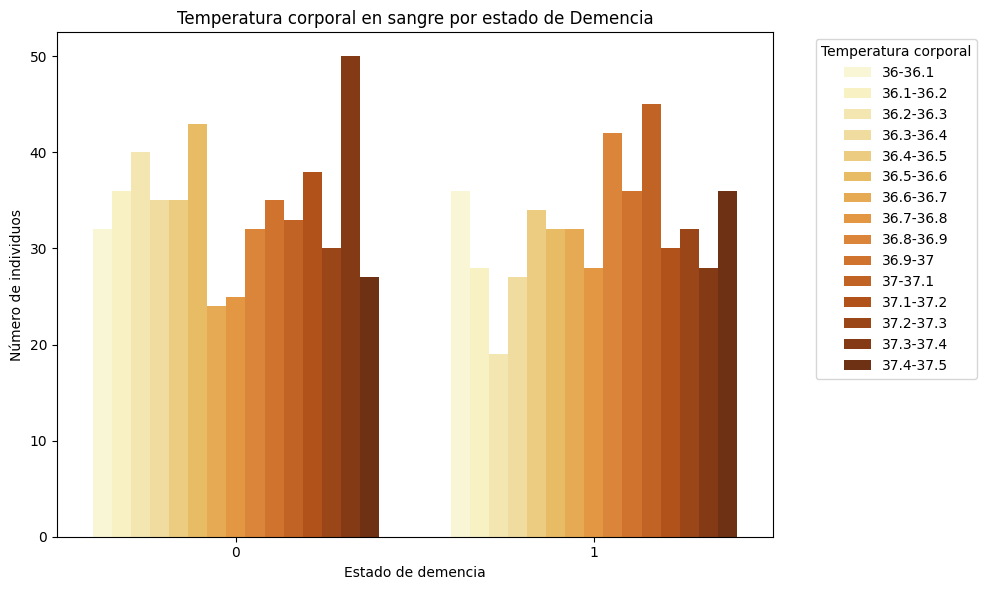

In [100]:
bins = [36, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37, 37.1, 37.2, 37.3, 37.4, 37.5]
labels = ["36-36.1", "36.1-36.2", "36.2-36.3", "36.3-36.4", "36.4-36.5", "36.5-36.6", "36.6-36.7", "36.7-36.8", "36.8-36.9", "36.9-37", "37-37.1", "37.1-37.2", "37.2-37.3", "37.3-37.4", "37.4-37.5"]

df['BodyTemperature'] = pd.cut(df['BodyTemperature'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='BodyTemperature', palette='YlOrBr', dodge=True)

plt.title('Temperatura corporal en sangre por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Temperatura corporal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

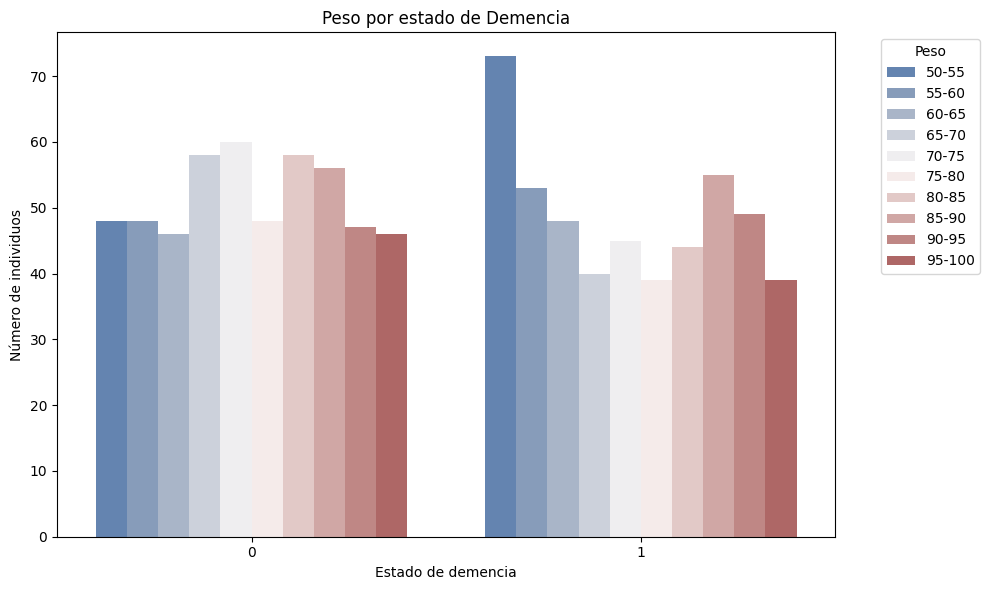

In [101]:
bins = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ["50-55", "55-60", "60-65", "65-70", "70-75", "75-80", "80-85", "85-90", "90-95", "95-100"]

df['Weight'] = pd.cut(df['Weight'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Weight', palette='vlag', dodge=True)

plt.title('Peso por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Peso', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

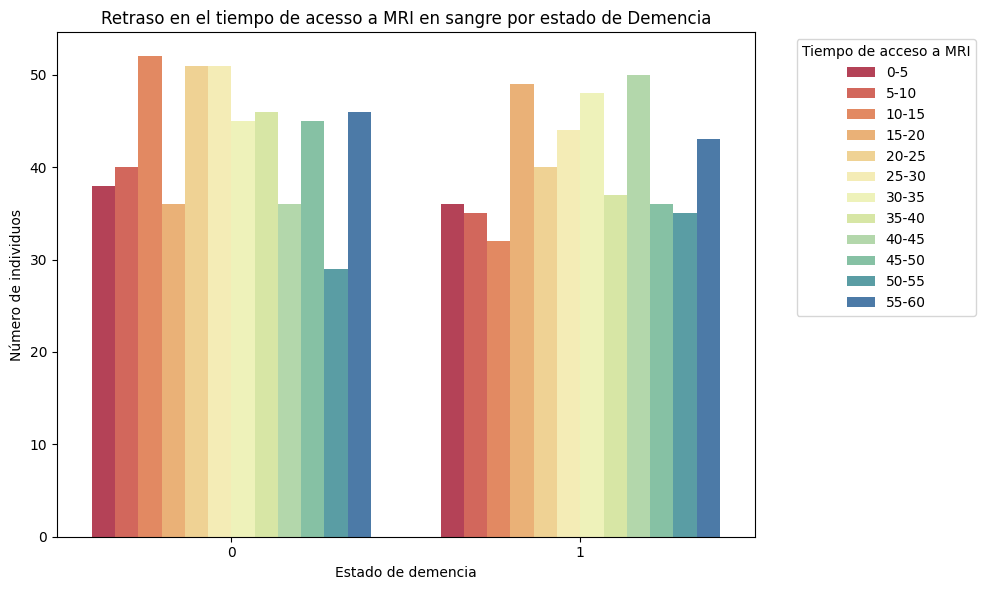

In [102]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55-60"]

df['MRI_Delay'] = pd.cut(df['MRI_Delay'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='MRI_Delay', palette='Spectral', dodge=True)

plt.title('Retraso en el tiempo de acesso a MRI en sangre por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Tiempo de acceso a MRI', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

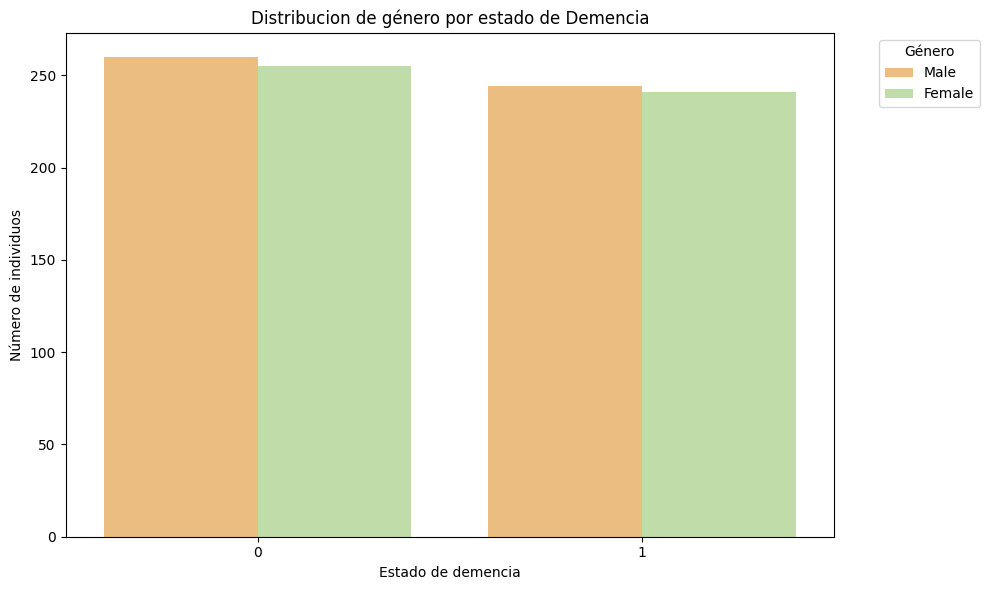

In [103]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Gender', palette='Spectral', dodge=True)

plt.title('Distribucion de género por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Género',labels=['Male', 'Female'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

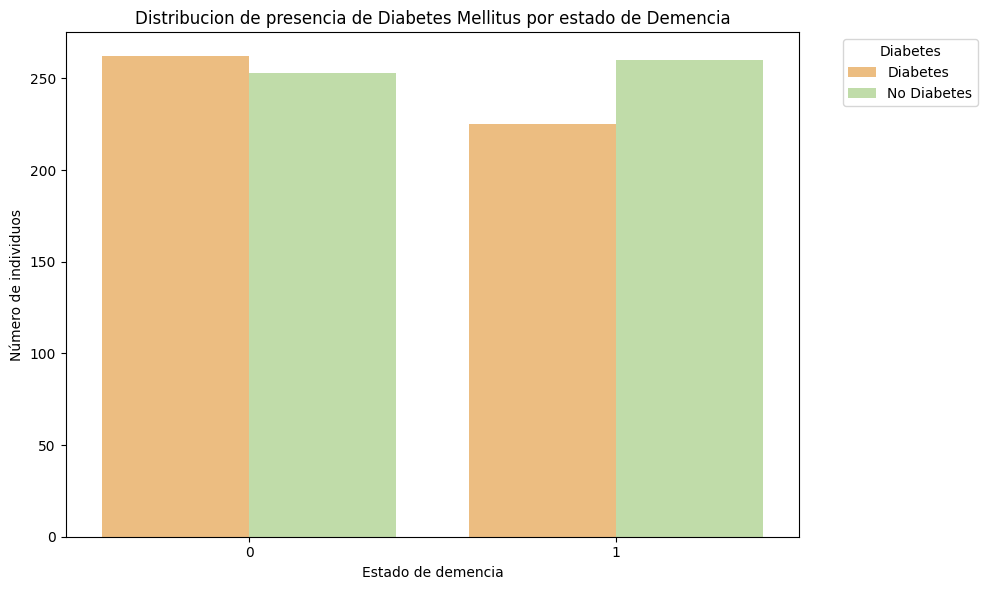

In [104]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Diabetic', palette='Spectral', dodge=True)

plt.title('Distribucion de presencia de Diabetes Mellitus por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Diabetes',labels=['Diabetes', 'No Diabetes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [105]:
df['Education_Level'].unique()


['Primary School', 'Secondary School', 'No School', 'Diploma/Degree']
Categories (4, object): ['Diploma/Degree', 'No School', 'Primary School', 'Secondary School']

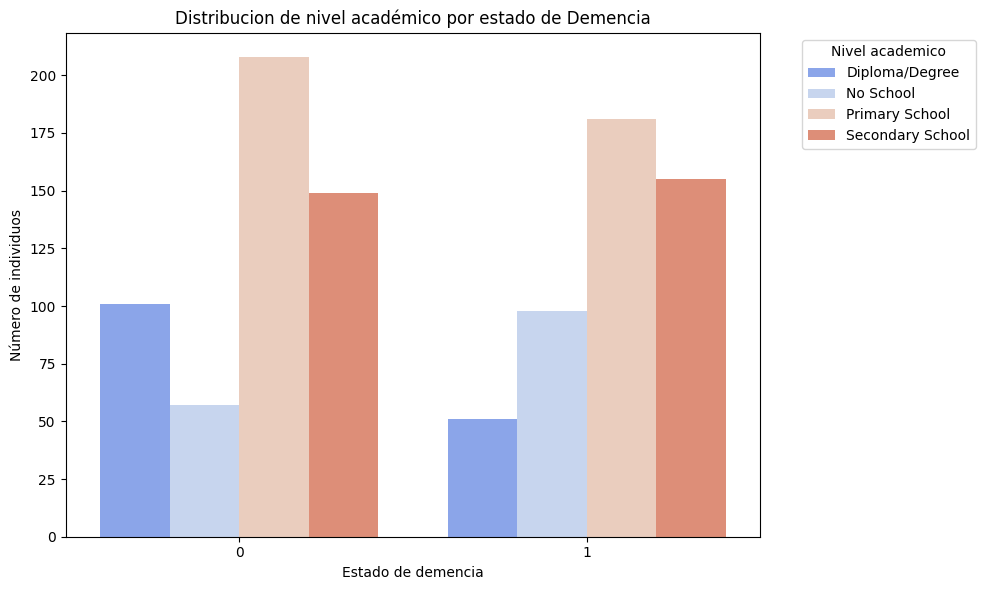

In [106]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Education_Level', palette='coolwarm', dodge=True)

plt.title('Distribucion de nivel académico por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Nivel academico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

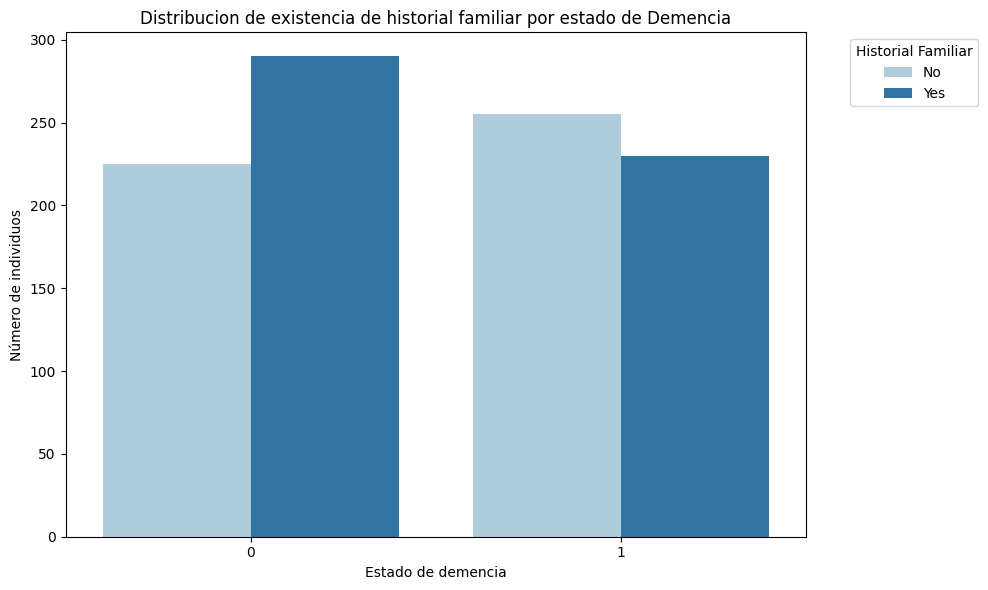

In [107]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Family_History', palette='Paired', dodge=True)

plt.title('Distribucion de existencia de historial familiar por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Historial Familiar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

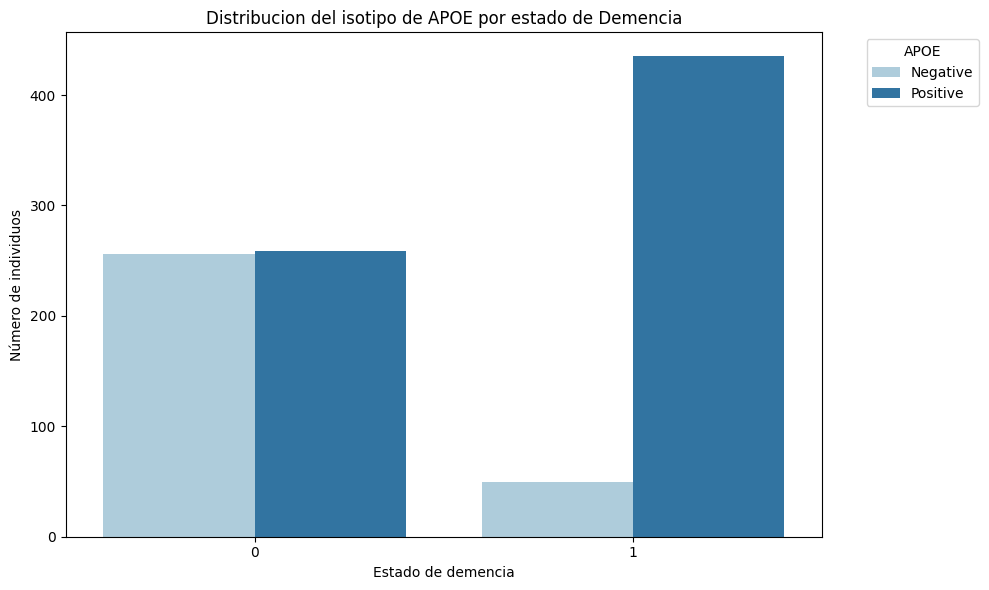

In [108]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='APOE_ε4', palette='Paired', dodge=True)

plt.title('Distribucion del isotipo de APOE por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='APOE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [109]:
df['Smoking_Status'].unique()

['Current Smoker', 'Former Smoker', 'Never Smoked']
Categories (3, object): ['Current Smoker', 'Former Smoker', 'Never Smoked']

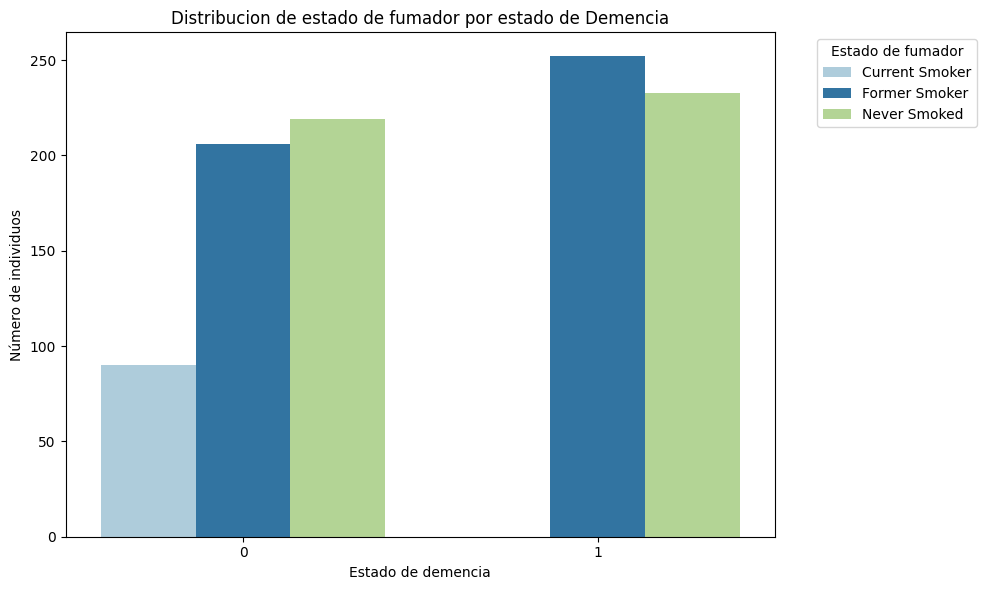

In [110]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Smoking_Status', palette='Paired', dodge=True)

plt.title('Distribucion de estado de fumador por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Estado de fumador', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [111]:
df['Physical_Activity'].unique()

['Sedentary', 'Moderate Activity', 'Mild Activity']
Categories (3, object): ['Mild Activity', 'Moderate Activity', 'Sedentary']

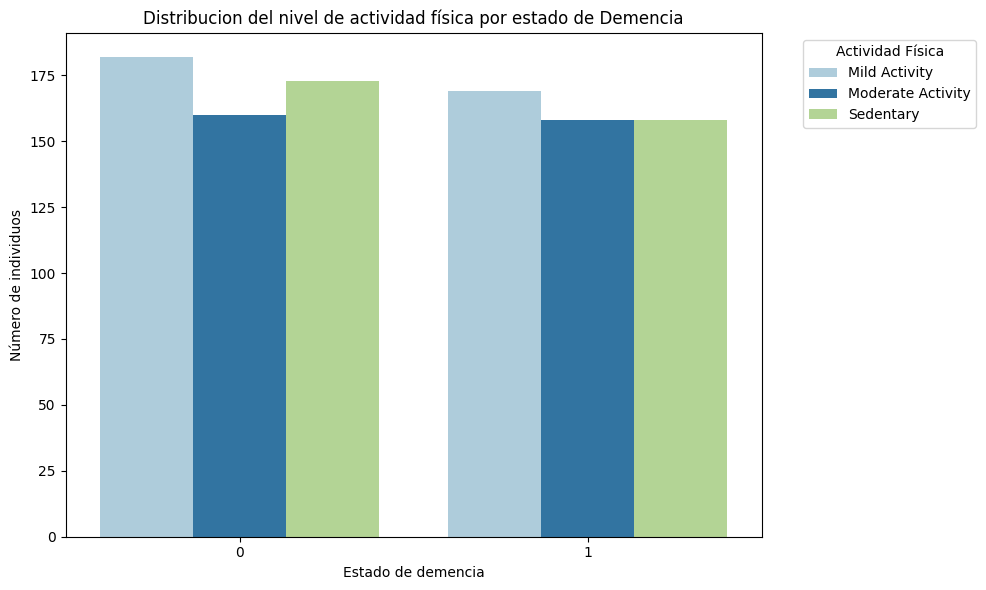

In [112]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Physical_Activity', palette='Paired', dodge=True)

plt.title('Distribucion del nivel de actividad física por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Actividad Física', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

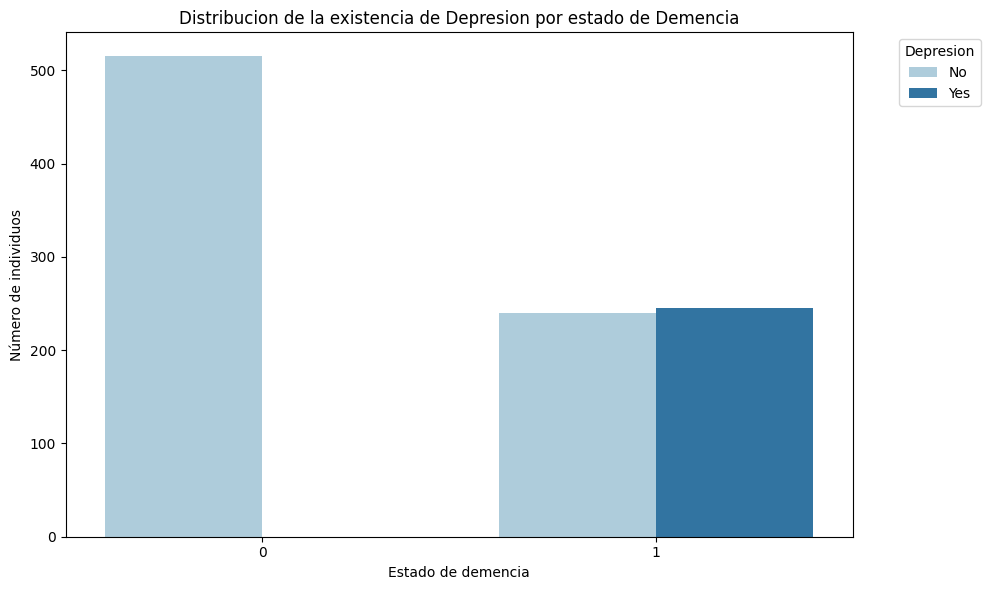

In [113]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Depression_Status', palette='Paired', dodge=True)

plt.title('Distribucion de la existencia de Depresion por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Depresion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

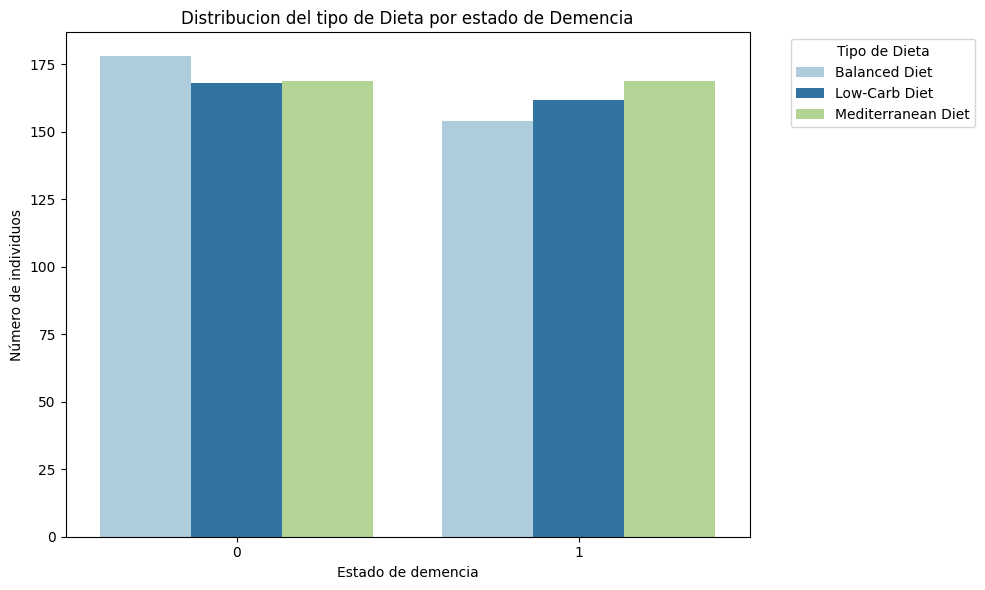

In [114]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Nutrition_Diet', palette='Paired', dodge=True)

plt.title('Distribucion del tipo de Dieta por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Tipo de Dieta', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

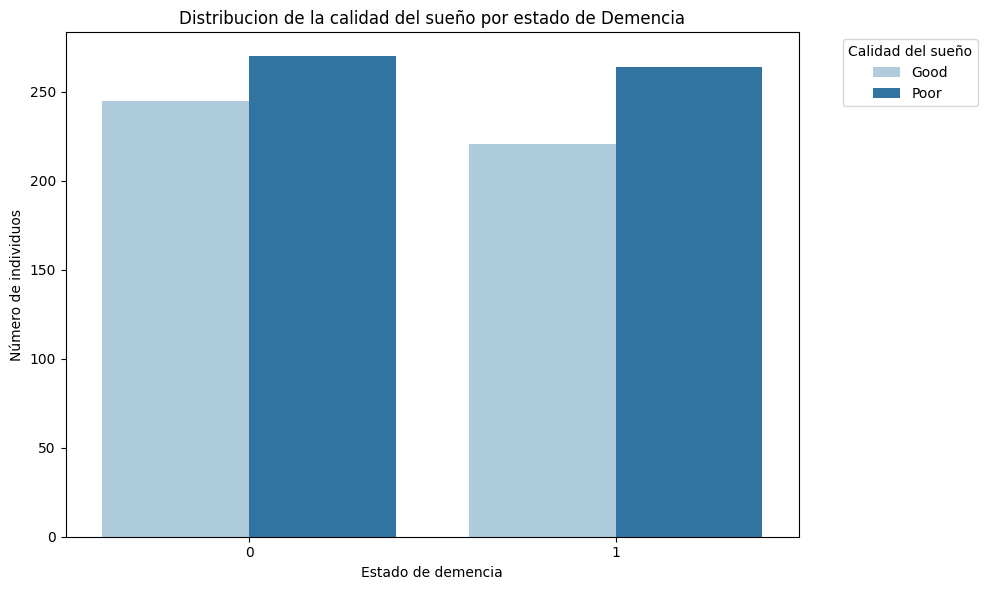

In [115]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Sleep_Quality', palette='Paired', dodge=True)

plt.title('Distribucion de la calidad del sueño por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Calidad del sueño', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

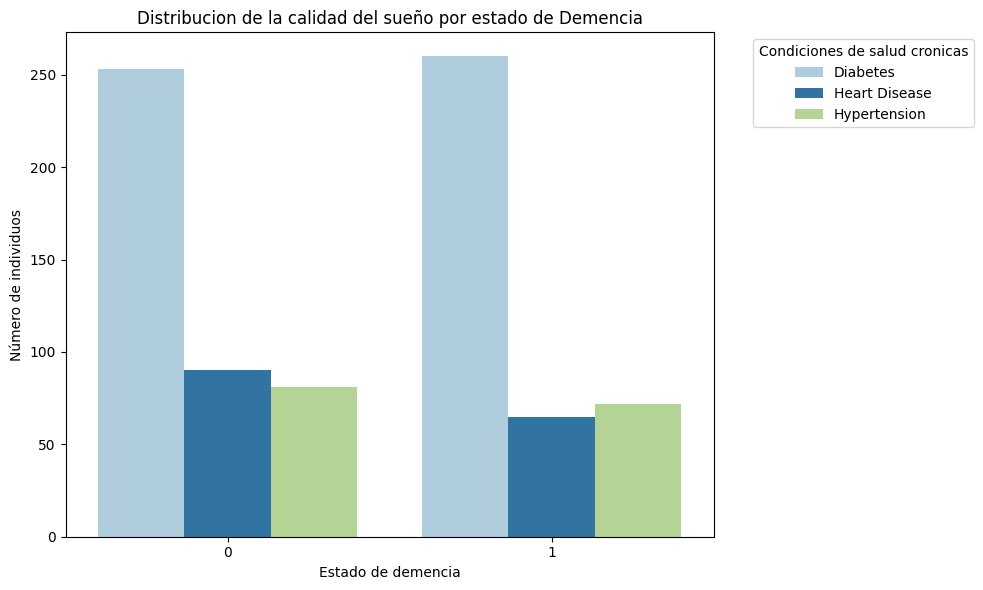

In [116]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Chronic_Health_Conditions', palette='Paired', dodge=True)

plt.title('Distribucion de la calidad del sueño por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Condiciones de salud cronicas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

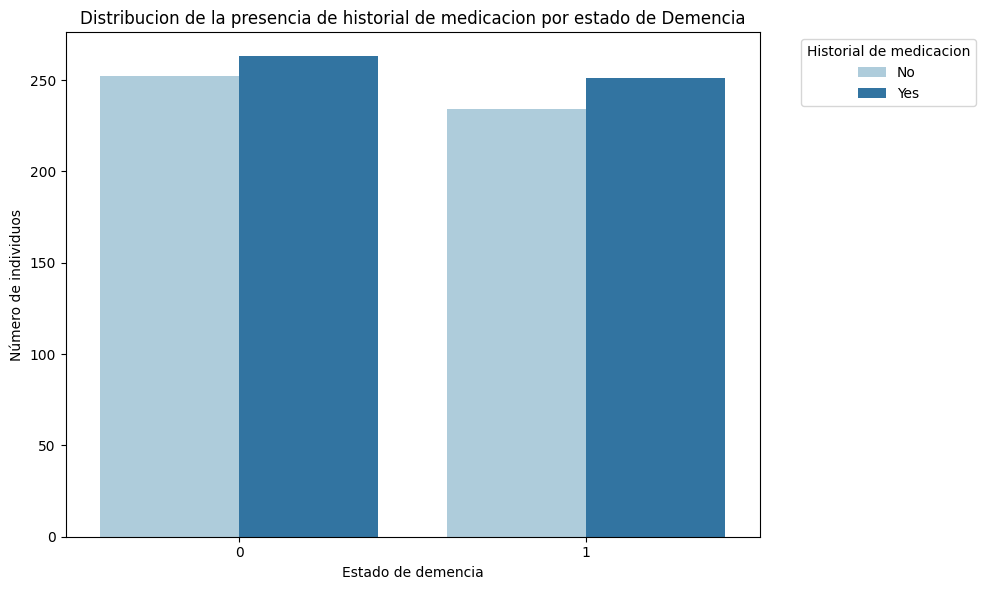

In [117]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Medication_History', palette='Paired', dodge=True)

plt.title('Distribucion de la presencia de historial de medicacion por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Historial de medicacion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

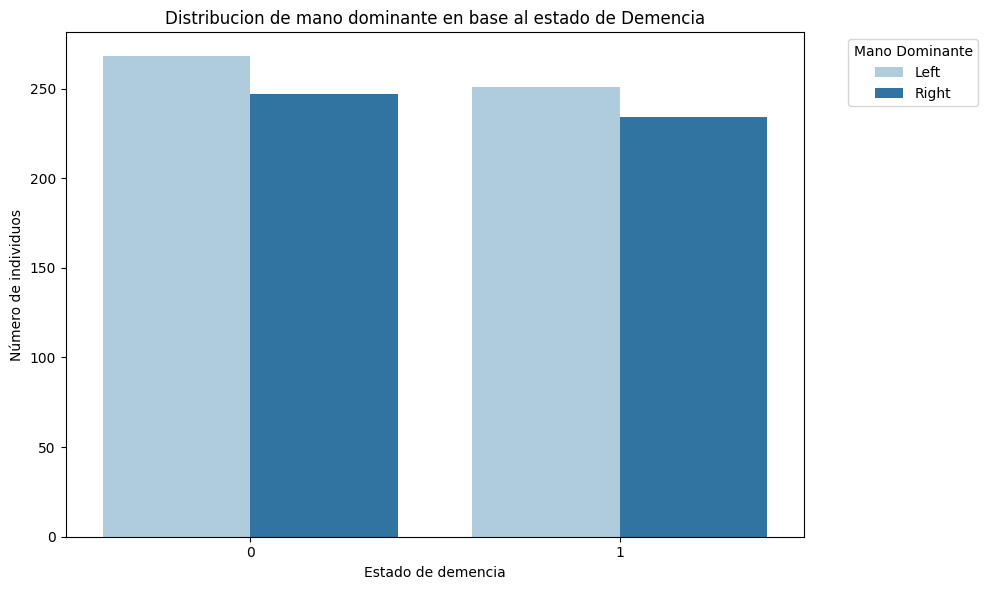

In [118]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Dominant_Hand', palette='Paired', dodge=True)

plt.title('Distribucion de mano dominante en base al estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Mano Dominante', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [119]:
corr = df.corr(numeric_only=True)

<Axes: >

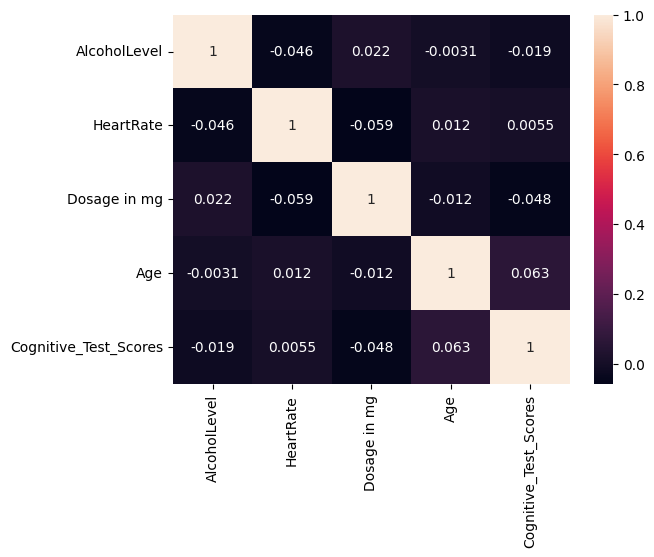

In [120]:
sns.heatmap(corr, annot=True)

### Prueba Chi-Cuadrado para variables cualitativas

In [121]:
#Vamos a eliminar Dementia de qualitative vars, ya que es necesario para realizar el test estadistico de forma correcta.

qualitative_vars = ['Diabetic', 'Education_Level', 'Gender', 'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity', 'Depression_Status', 'Medication_History', 'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions']

for var in qualitative_vars:
    contingency_table = pd.crosstab(df['Dementia'], df[var])
    if contingency_table.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Prueba chi-cuadrado para Dementia y {var} - p-valor: {p}")

resultados = []

for var in qualitative_vars:
    contingency_table = pd.crosstab(df['Dementia'], df[var])
    if contingency_table.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        resultados.append({
            'Variable': var,
            'Chi2': chi2,
            'p-valor': p,
            'Grados de libertad': dof
        })
df_resultados = pd.DataFrame(resultados).sort_values(by='p-valor')
df_resultados.style.background_gradient(cmap='coolwarm', subset=['p-valor'])\
              .format({'p-valor': '{:.4f}', 'Chi2': '{:.2f}'})

Prueba chi-cuadrado para Dementia y Diabetic - p-valor: 0.17577171167745576
Prueba chi-cuadrado para Dementia y Education_Level - p-valor: 2.978218555755516e-06
Prueba chi-cuadrado para Dementia y Gender - p-valor: 1.0
Prueba chi-cuadrado para Dementia y Family_History - p-valor: 0.00599065320507048
Prueba chi-cuadrado para Dementia y Smoking_Status - p-valor: 3.438453432824831e-21
Prueba chi-cuadrado para Dementia y APOE_ε4 - p-valor: 3.361860536197276e-41
Prueba chi-cuadrado para Dementia y Physical_Activity - p-valor: 0.8719418594188298
Prueba chi-cuadrado para Dementia y Depression_Status - p-valor: 2.5231461865259745e-76
Prueba chi-cuadrado para Dementia y Medication_History - p-valor: 0.8782537905620287
Prueba chi-cuadrado para Dementia y Nutrition_Diet - p-valor: 0.6234787909613961
Prueba chi-cuadrado para Dementia y Sleep_Quality - p-valor: 0.5672841025931478
Prueba chi-cuadrado para Dementia y Chronic_Health_Conditions - p-valor: 0.1515767886250358


,Variable,Chi2,p-valor,Grados de libertad
7,Depression_Status,341.85,0.0000,1
5,APOE_ε4,180.73,0.0000,1
4,Smoking_Status,94.24,0.0000,2
1,Education_Level,28.41,0.0000,3
3,Family_History,7.55,0.0060,1
11,Chronic_Health_Conditions,3.77,0.1516,2
0,Diabetic,1.83,0.1758,1
10,Sleep_Quality,0.33,0.5673,1
9,Nutrition_Diet,0.94,0.6235,2
6,Physical_Activity,0.27,0.8719,2


C:\Users\jonol\AppData\Local\Temp\ipykernel_8628\2818595944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultados, x='p-valor', y='Variable', palette='viridis')


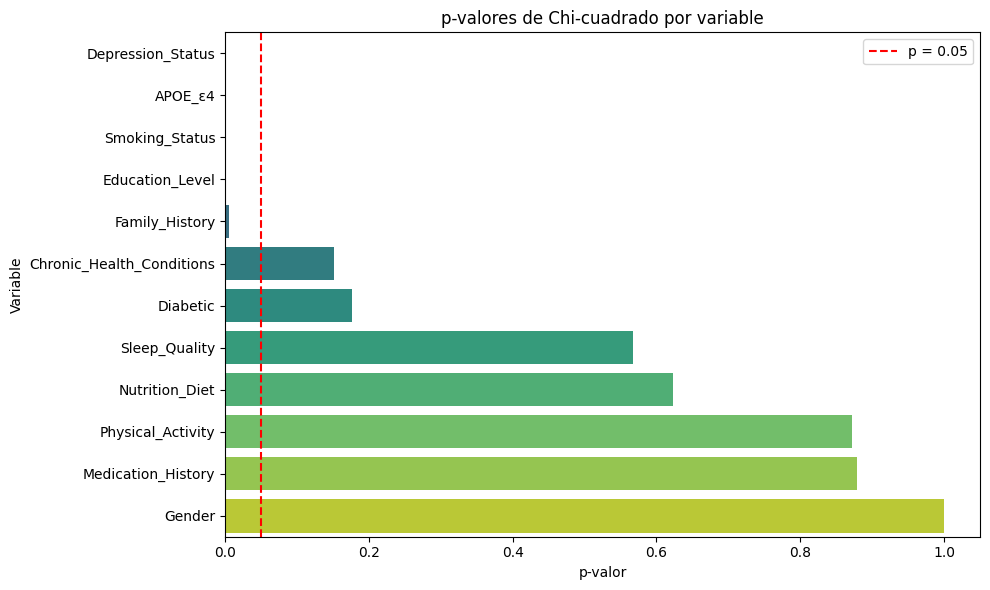

In [122]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultados, x='p-valor', y='Variable', palette='viridis')
plt.axvline(0.05, color='red', linestyle='--', label='p = 0.05')
plt.title('p-valores de Chi-cuadrado por variable')
plt.xlabel('p-valor')
plt.ylabel('Variable')
plt.legend()
plt.tight_layout()
plt.show()

### Pruebas de Normalidad y T-Student para variables numéricas.

In [135]:
for var in quantitative_vars:
    group1 = df[df['Dementia'] == 0][var].dropna()
    group2 = df[df['Dementia'] == 1][var].dropna()
    
    stat1, p1 = shapiro(group1)
    stat2, p2 = shapiro(group2)
    print(f"Normalidad para {var} en grupo no demencia - p-valor: {p1:.4f}")
    print(f"Normalidad para {var} en grupo demencia - p-valor: {p2:.4f}")
    
    if p1 > 0.05 and p2 > 0.05:
        stat, p = ttest_ind(group1, group2)
        test_type = 'T de Student'
    else:
        stat, p = mannwhitneyu(group1, group2)
        test_type = 'Wilcoxon'
        
    print(f"Prueba {test_type} para {var} entre grupos de Dementia - p-valor: {p:.4f}\n")


Normalidad para AlcoholLevel en grupo no demencia - p-valor: 0.0000
Normalidad para AlcoholLevel en grupo demencia - p-valor: 0.0000
Prueba Wilcoxon para AlcoholLevel entre grupos de Dementia - p-valor: 0.8939

Normalidad para HeartRate en grupo no demencia - p-valor: 0.0000
Normalidad para HeartRate en grupo demencia - p-valor: 0.0000
Prueba Wilcoxon para HeartRate entre grupos de Dementia - p-valor: 0.7231



ValueError: could not convert string to float: '96-97'

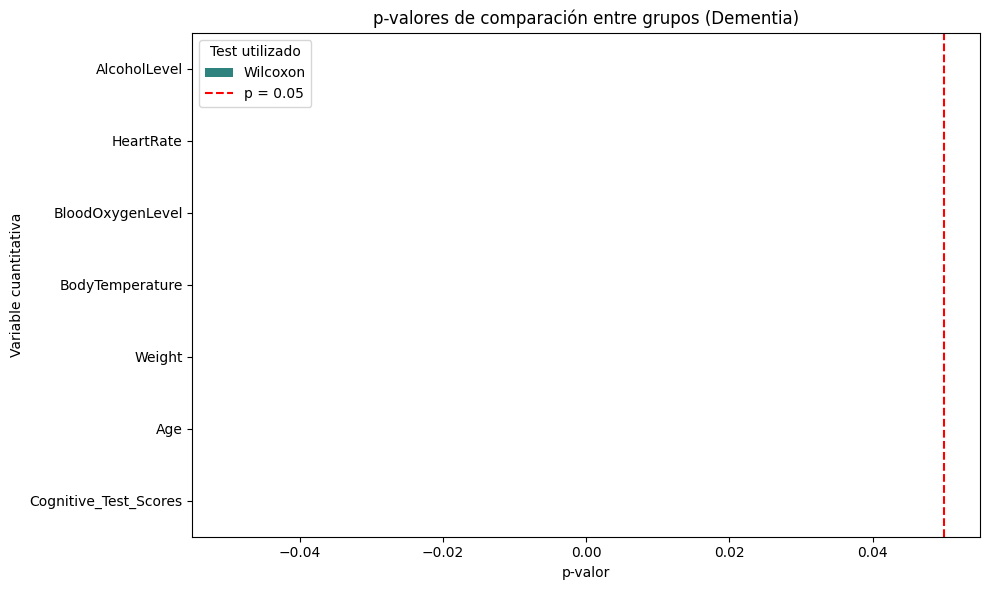

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultados_cuant, x='p_comparacion', y='Variable', hue='Test', dodge=False, palette='viridis')
plt.axvline(0.05, color='red', linestyle='--', label='p = 0.05')
plt.title('p-valores de comparación entre grupos (Dementia)')
plt.xlabel('p-valor')
plt.ylabel('Variable cuantitativa')
plt.legend(title='Test utilizado')
plt.tight_layout()
plt.show()

### Modelo de Regresión Logística

In [ ]:
def rango_a_promedio(valor):
    if isinstance(valor, str) and '-' in valor:
        try:
            a, b = map(float, valor.split('-'))
            return (a + b) / 2
        except:
            return np.nan
    return valor

cols_a_corregir = ['BloodOxygenLevel', 'BodyTemperature', 'Weight']

for col in cols_a_corregir:
    df[col] = df[col].apply(rango_a_promedio)
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nTipos de datos tras la corrección:")
print(df[cols_a_corregir].dtypes)

for col in cols_a_corregir:
    print(f"\n{col} → valores únicos de ejemplo: {df[col].dropna().unique()[:5]}")



Tipos de datos tras la corrección:
BloodOxygenLevel    float64
BodyTemperature     float64
Weight              float64
dtype: object

BloodOxygenLevel → valores únicos de ejemplo: [96.5 93.5 97.5 94.5 92.5]

BodyTemperature → valores únicos de ejemplo: [36.25 36.15 37.35 37.05 36.05]

Weight → valores únicos de ejemplo: [57.5 67.5 82.5 52.5 77.5]


In [ ]:
df = df[df['Dementia'].notna()]
df['Dementia'] = df['Dementia'].map({'No Demencia': 0, 'Demencia': 1})


quantitative_vars_model = ['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 'Age', 'Cognitive_Test_Scores']
qualitative_vars_model = ['Diabetic', 'Education_Level', 'Gender', 'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity', 'Depression_Status', 'Medication_History', 'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions']

target = 'Dementia'

X = df[quantitative_vars_model + qualitative_vars_model]
y = df[target]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, quantitative_vars_model),
    ('cat', categorical_transformer, qualitative_vars_model)
])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
print(f"Accuracy: {clf.score(X_test, y_test):.3f}")

Accuracy: 0.985


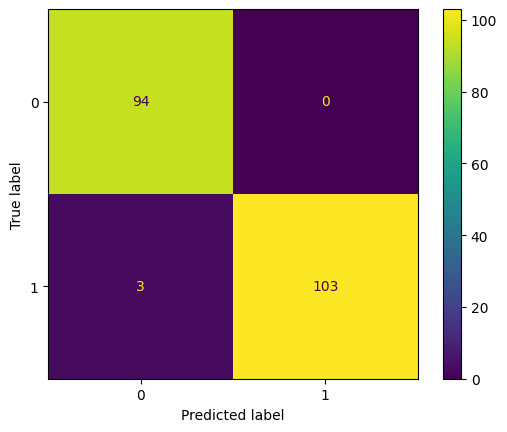

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        94
           1       1.00      0.97      0.99       106

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



In [ ]:
y.value_counts(normalize=True)


Dementia
0    0.515
1    0.485
Name: proportion, dtype: float64

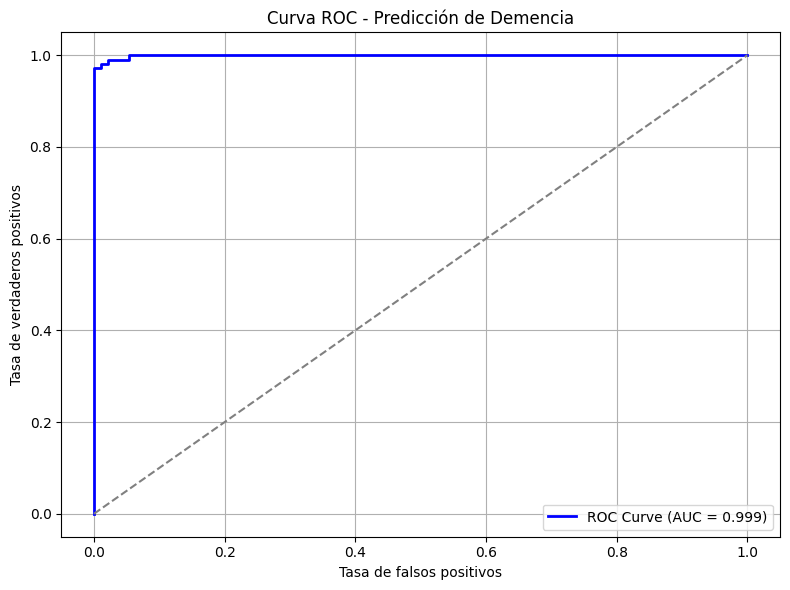

In [ ]:
y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - Predicción de Demencia')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
quantitative_vars_model = ['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 'Age', 'Cognitive_Test_Scores']
qualitative_vars_model = ['Diabetic', 'Education_Level', 'Gender', 'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity', 'Depression_Status', 'Medication_History', 'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions']

target = 'Dementia'

X = df[quantitative_vars_model + qualitative_vars_model]
y = df[target]

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=40, stratify=y
)

rf_model = RandomForestClassifier(n_estimators=500, random_state=40)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)

positive_class = rf_model.classes_[1]
positive_class_index = list(rf_model.classes_).index(positive_class)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=positive_class)
recall = recall_score(y_test, y_pred, pos_label=positive_class)
auc = roc_auc_score(y_test.cat.codes, y_proba[:, positive_class_index])  # cat.codes en caso de tipo category

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
AUC: 1.0000

Confusion Matrix:
 [[155   0]
 [  0 145]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       145

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [ ]:
importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)
print(importances.sort_values(ascending=False).head(10))


Cognitive_Test_Scores        0.646512
Depression_Status_Yes        0.140022
APOE_ε4_Positive             0.071282
AlcoholLevel                 0.017684
HeartRate                    0.014915
Age                          0.014696
BodyTemperature              0.012673
BloodOxygenLevel             0.012139
Weight                       0.011459
Education_Level_No School    0.008170
dtype: float64


In [ ]:
scores = cross_val_score(rf_model, X_encoded, y, cv=5)
print("Cross-validated accuracy:", scores.mean())

Cross-validated accuracy: 1.0
